# Decision Tree Model

In this notebook we will expirement with a decision tree to get an optimal predicted repair time.

## Imports

In [1]:
from pandas import read_csv as pd_read_csv, DataFrame
from numpy import array as np_array, sqrt as np_sqrt
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

## Fetching

In [2]:
df = pd_read_csv("../Data/CSV/cleaned.csv", sep=';', low_memory=False)
print(f'No less than {df.shape[0]} rows and {df.shape[1]} columns!')

No less than 252751 rows and 12 columns!


## Model

In [3]:
model = DecisionTreeClassifier()

feature_names = ['geocode', 'prioriteit', 'oorzaakcode']
features = df[feature_names]
target_names = ['hersteltijd_15']
targets = df[target_names]

#: Split data into train set (80%) and test set (20%).
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, random_state=10)
model.fit(features_train, targets_train)
print(f'{len(features_train)} elementen in de trainset en {len(features_test)} elementen in de testset')

189563 elementen in de trainset en 63188 elementen in de testset


We choose a decision tree classifier in the hope that the model sees a correlation that isn't directly noticeable by comparing the numbers as individuals but as groups.

In [4]:
#: We calculate the module score by using the test set, 
#: this is why splitting your data into a training and test set is important.
score_1 = model.score(features_test, targets_test)

# An alternative way to calculate the predicted value is by predicting the model's targets by using the features test as input
# and scoring it against the actual targets of the test set.
targets_model = model.predict(features_test)
score_2 = accuracy_score(targets_test, targets_model)
print(f'Scores (methode 1 = {score_1}) and (methode 2 = {score_2}) so the methods are equal is {score_1 == score_2}.')
print(f'With a mean error of: {np_sqrt(mean_squared_error(targets_test, targets_model))}')

Scores (methode 1 = 0.3177027283661455) and (methode 2 = 0.3177027283661455) so the methods are equal is True.
With a mean error of: 51.88588314059015


The scores are not optimal but reasonable, the unreasonable part is the mean squared error. We have tried multiple hyperparameters and transforming the data, but it seems to be as bad or even worse than this result. Later in this notebook we will test it on our subset.

## Displaying

[Text(558.0, 475.65000000000003, 'oorzaakcode <= 296.0\ngini = 0.815\nsamples = 189563\nvalue = [63038, 37232, 25094, 18883, 11916, 8810, 6158, 5117\n3576, 2962, 2168, 1895, 1440, 1274]'),
 Text(279.0, 339.75, 'prioriteit <= 4.5\ngini = 0.824\nsamples = 181954\nvalue = [56545, 36822, 24882, 18709, 11826, 8752, 6119, 5076\n3551, 2940, 2157, 1882, 1427, 1266]'),
 Text(139.5, 203.85000000000002, 'oorzaakcode <= 272.0\ngini = 0.812\nsamples = 121732\nvalue = [41193, 23772, 15992, 11780, 7689, 5608, 3884, 3179\n2278, 1912, 1460, 1224, 935, 826]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'oorzaakcode <= 182.5\ngini = 0.842\nsamples = 60222\nvalue = [15352, 13050, 8890, 6929, 4137, 3144, 2235, 1897, 1273\n1028, 697, 658, 492, 440]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'oorzaakcode <= 298.5\ngini = 0.267\nsamples =

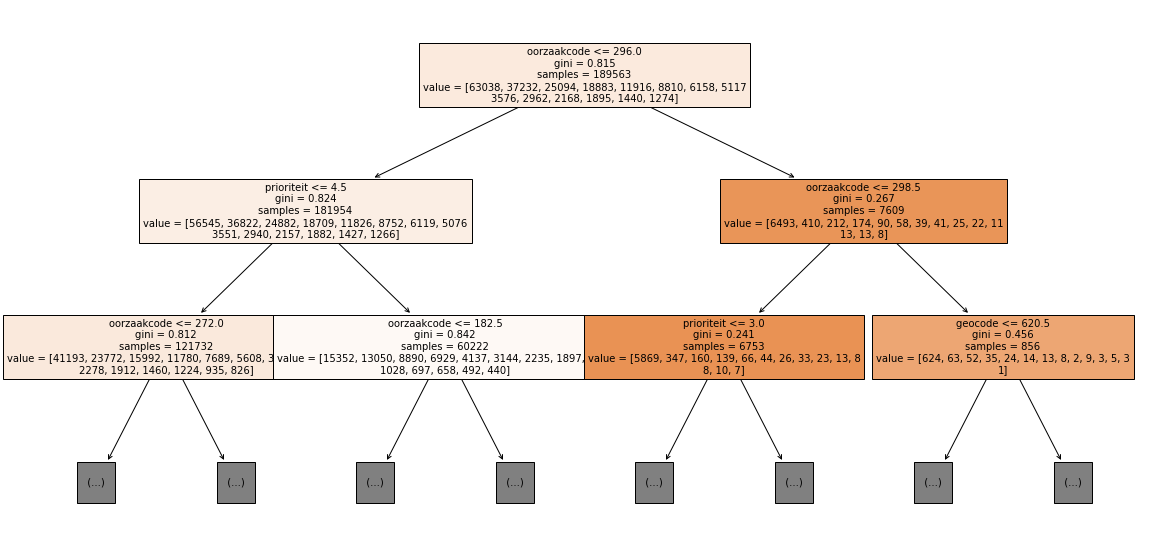

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, filled=True, max_depth=2, fontsize=10)

We can see how the top part of the decision tree works, displaying it all would be far too much to take in that is why we let computers process it. At the top we see a decision the tree makes, is the oorzaakcode lower or equal to 296 proceed to the left and do that check, if not proceed to the right and to the right check. This will happen until we hit the bottom and get classified into a group. 

## Predicting

In [6]:
subset_df = pd_read_csv("../Data/CSV/subset.csv", sep=';')
features = subset_df[feature_names]
targets = subset_df['hersteltijd_15']
subset_df.head()

,meldnummer,oorzaakcode,prioriteit,melddatum,geocode,beschrijving,hersteltijd,hersteltijd_15
0,80774347,130,9,2014-07-31 10:28:00,555,test ESB,2,0
1,80626718,298,9,2011-07-31 11:43:00,666,"Mtna : E-boog AC-trip aangesproken, geen trei...",1,0
2,80878866,221,9,2017-01-31 10:43:25,564,Gvc : Inttel geeft fout melding.,186,180
3,80704628,221,9,2013-01-31 09:20:00,114,"Wspl : RH60 gelijkrichter defect, er staa een...",59,45
4,80651548,221,9,2012-01-31 01:52:00,76,Bv-Utg : sp BA t.o.b.s. gemaakt tijdens werkz...,155,150


In [7]:
targets_model = model.predict(features)
score = accuracy_score(targets, targets_model)
print(f'Score = {score}, predictions = {targets_model}, ground truth = {targets.values}.')

Score = 0.7, predictions = [  0   0 180   0   0   0   0   0   0  45], ground truth = [  0   0 180  45 150   0 195   0   0  45].


With a score of 0.7 we would think that it does quite well but we see that it uses it's default answer (0) quite a lot which just happens to match up with the subset data.

In [25]:
model.predict_proba(features)

array([[0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41666667, 0.20833333, 0.04166667, ..., 0.        , 0.        ,
        0.        ],
       [0.83333333, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ]])

this shows the chances in wich leaf the rapairtime will fall.

## Saving

In [8]:
subset_df['hersteltijd_dt'] = targets_model
subset_df.to_csv('../Data/CSV/subset.csv', sep=';', index=False)

Lastly we make a new column for the predicted results and save it so we can use it in the GUI later on.

## Conclusion

With a score of ~0.32 the model scores suboptimal, we would like to improve this and will look into other possible models like logistic regression.